In [3]:
from seqfold import fold, dg, dg_cache, dot_bracket
import RNA
import numpy as np
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
from forgi.graph.bulge_graph import BulgeGraph



ModuleNotFoundError: No module named 'seqfold'

The minimum free energy (MFE) in RNA sequences refers to the lowest thermodynamic energy state that a given RNA molecule can adopt. This energy state corresponds to the most stable secondary structure of the RNA molecule, typically achieved through the formation of base pairs within the molecule. 

It's important to note that the actual minimum free energy can vary depending on factors such as temperature, ionic conditions, and the presence of specific RNA-binding proteins or ligands. Additionally, RNA sequences can adopt multiple secondary structures with different free energies, so determining the absolute minimum free energy can be complex and context-dependent.

In [27]:


def predict_secondary_structure(sequence, constraint = True):
    fc = RNA.fold_compound(sequence)

    
    if constraint:
        constraint_length = (len(sequence) -8)
        constr = "(" * 4 + '.'*constraint_length + ")" * 4
        fc.hc_add_from_db(constr)
    
    (ss, mfe) = fc.mfe()
    return ss, mfe

strn15  = "CGACGGAGGTGGTGTCTTGGACAGTGGTATTCGCAGTTGCGTCG"
strn15cor  = "CGACGGAGGTGGTGTCTTCCCCAGTGGTATTCGCAGTTGCGTCG"
srtn18  = "CGACTGGTAGGCAGATAGGGGAAGCTGATTCGATGCGTGGGTCG"
psrtn12 = "CGACTGGTAGGCAACAGGGGAAGGGAGTTCTGCGTACGTGGGTCG"
psrtn12cor = "CGACTGGTAGGCAACCCCGGAAGGGAGTTCTGCGTACGTGGGTCG"
structure, mfe = predict_secondary_structure(strn15)
structure2, mfe2  = predict_secondary_structure(strn15cor)
print("Sequence:", psrtn12)
print("Predicted Secondary Structure:", structure)
print("Minimum Free Energy (MFE):", mfe, mfe2)

Sequence: CGACTGGTAGGCAACAGGGGAAGGGAGTTCTGCGTACGTGGGTCG
Predicted Secondary Structure: (((((.((.(((.((((........)).)).).)).)).)))))
Minimum Free Energy (MFE): -10.5 -11.600000381469727


/local/hdd/climaco/anaconda3/envs/aptamers/lib/python3.9/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


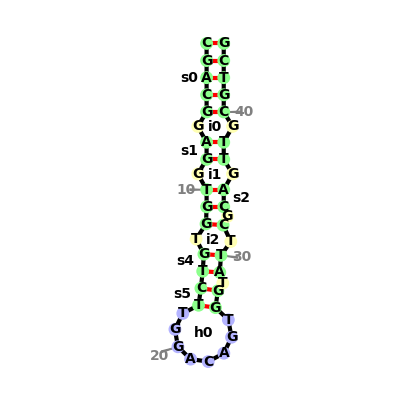

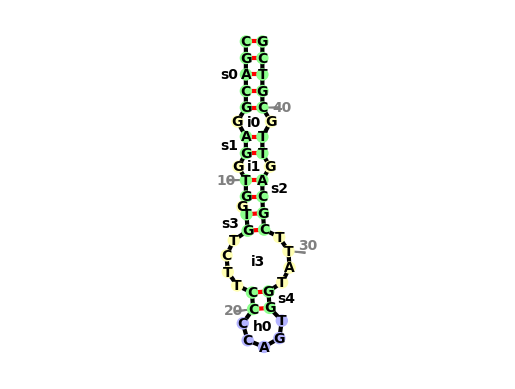

In [28]:

plt.figure(figsize=(5,5))
bg = BulgeGraph.from_dotbracket(structure, strn15)
bg2 = BulgeGraph.from_dotbracket(structure2, strn15cor)

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()
fvm.plot_rna(bg2, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [5]:
print(bg.to_bg_string())


name untitled
length 45
seq CGACTGGTAGGCAACAGGGGAAGGGAGTTCTGCGTACGTGGGTCG
seq_ids A:1 A:2 A:3 A:4 A:5 A:6 A:7 A:8 A:9 A:10 A:11 A:12 A:13 A:14 A:15 A:16 A:17 A:18 A:19 A:20 A:21 A:22 A:23 A:24 A:25 A:26 A:27 A:28 A:29 A:30 A:31 A:32 A:33 A:34 A:35 A:36 A:37 A:38 A:39 A:40 A:41 A:42 A:43 A:44 A:45
define s0 1 5 41 45
define i0 6 6 38 40
define s1 7 9 35 37
define i1 10 10 34 34
define s2 11 13 31 33
define i2 14 16
define s3 17 19 28 30
define h0 20 27
connect s0 i0
connect s1 i0 i1
connect s2 i1 i2
connect s3 i2 h0



In [6]:
print(bg.to_pair_tuples())

[(1, 45), (2, 44), (3, 43), (4, 42), (5, 41), (41, 5), (42, 4), (43, 3), (44, 2), (45, 1), (7, 37), (8, 36), (9, 35), (35, 9), (36, 8), (37, 7), (11, 33), (12, 32), (13, 31), (31, 13), (32, 12), (33, 11), (17, 30), (18, 29), (19, 28), (28, 19), (29, 18), (30, 17), (6, 0), (38, 0), (39, 0), (40, 0), (10, 0), (34, 0), (14, 0), (15, 0), (16, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0)]
